In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_json("../assets/clean_reviews.json", orient='records')
data

,reviewid,title,artist,score,author,review_publication_date,genre,song_release_year,record_label,review_content
0,22703,mezzanine,massive attack,9.3,nate patrin,1483833600000,electronic,1998,virgin,"“Trip-hop” eventually became a ’90s punchline,..."
1,22721,prelapsarian,krallice,7.9,zoe camp,1483747200000,metal,2016,hathenter,"Eight years, five albums, and two EPs in, the ..."
2,22659,all of them naturals,uranium club,7.3,david glickman,1483747200000,rock,2016,static shock|fashionable idiots,Minneapolis’ Uranium Club seem to revel in bei...
3,22661,first songs,"kleenex, liliput",9.0,jenn pelly,1483660800000,rock,2016,kill rock stars|mississippi,Kleenex began with a crash. It transpired one ...
4,22725,new start,taso,8.1,kevin lozano,1483660800000,electronic,2016,teklife,It is impossible to consider a given release b...
...,...,...,...,...,...,...,...,...,...,...
18412,1535,let us replay!,coldcut,8.9,james p. wisdom,917308800000,jazz|electronic,None,ninja tune,The marketing guys of yer average modern megac...
18413,1341,1999,cassius,4.8,james p. wisdom,917308800000,electronic,None,astralwerks,"Well, it's been two weeks now, and I guess it'..."
18414,5376,out of tune,mojave 3,6.3,jason josephes,916099200000,rock,None,4ad,"Out of Tune is a Steve Martin album. Yes, I'l..."
18415,2413,"singles breaking up, vol. 1",don caballero,7.2,james p. wisdom,916099200000,rock|metal|experimental,1999,touch and go,"Well, kids, I just went back and re-read my re..."


In [11]:
f = data[]
print(f)
df = pd.DataFrame(f.tolist(), columns=data.columns)

df.to_json('../solrData/r.json', orient='records')
df

reviewid                                                               22703
title                                                              mezzanine
artist                                                        massive attack
score                                                                    9.3
author                                                           nate patrin
review_publication_date                                        1483833600000
genre                                                             electronic
song_release_year                                                       1998
record_label                                                          virgin
review_content             “Trip-hop” eventually became a ’90s punchline,...
Name: 0, dtype: object


ValueError: Shape of passed values is (10, 1), indices imply (10, 10)

In [2]:
authors = np.array(data['author'])
unique = np.unique(authors)
print(len(unique))
amount = []
for name in unique:
    amount.append(np.count_nonzero(authors == name))

    
amount = np.array(amount)
print(len(amount[amount < 10]))
relevantAmount = amount[amount > 50]

relevantAuthors = unique[amount > 50]
print(len(relevantAuthors))

432
214
85


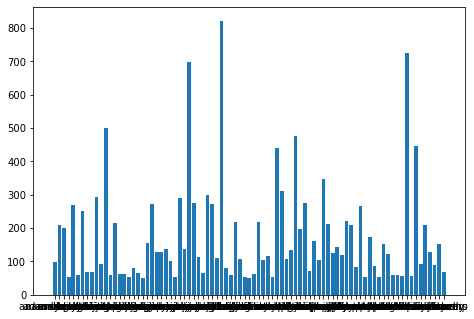

In [3]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(relevantAuthors, relevantAmount)
plt.show()

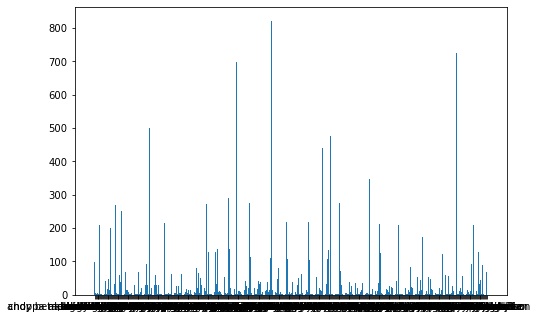

In [4]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique, amount)
plt.show()

In [5]:
print(unique[amount > 600])

['ian cohen' 'joe tangari' 'stephen m. deusner']
